In [1]:
from numpy import pi


Ms = 1.42e5 #[A / m]
gamma = 2.21e5 #[m / (A * s)]

In [2]:
from processing.pipelines import pipeline_modes_vs_formfactor_parity, pipeline_modes_vs_formfactor_m, pipeline_modes_vs_formfactor_char
import pandas as pd


path_p_nonuniform = 'data_rep/Cyl_axis_oriented_magnetic_field/parity/non-uniform_magnetization'
path_m_nonuniform = 'data_rep/Cyl_axis_oriented_magnetic_field/ms/non-uniform_magnetization'
#path_char = 'data_rep/Cyl_formfactor/mode_char'

nonuniform_df_p = pipeline_modes_vs_formfactor_parity(path=path_p_nonuniform)
nonuniform_df_m = pipeline_modes_vs_formfactor_m(path=path_m_nonuniform)
#df_char = pipeline_modes_vs_formfactor_char(path=path_char)

nonuniform_df = nonuniform_df_m.join(nonuniform_df_p, on='index', rsuffix='_p')

nonuniform_df = nonuniform_df.drop(columns=[col for col in nonuniform_df.columns if '_p' in col])
nonuniform_df

While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
/home/aluatar/scicodes/mom_processing/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling

,param_0,ef_1,m,index,p
0,50000.0,3.500677,1.0,0,1.0
1,50000.0,3.934469,1.0,1,-1.0
2,50000.0,5.060124,0.0,2,1.0
3,50000.0,5.537650,2.0,3,1.0
4,50000.0,5.966049,0.0,4,-1.0
...,...,...,...,...,...
616,498800.0,21.920980,0.0,616,-1.0
617,498800.0,21.937936,2.0,617,-1.0
618,498800.0,23.225305,1.0,618,1.0
619,498800.0,24.375464,1.0,619,1.0


In [3]:
nonuniform_df.loc[159,'m'] = 1
nonuniform_df.loc[212,'m'] = 2
nonuniform_df.loc[248,'m'] = 2

#df.loc[df['param_0']==228200], df.loc[df['param_0']==228200 + 6.6E3]

1.0
1.0
0.0
0.0
2.0
2.0
3.0
3.0


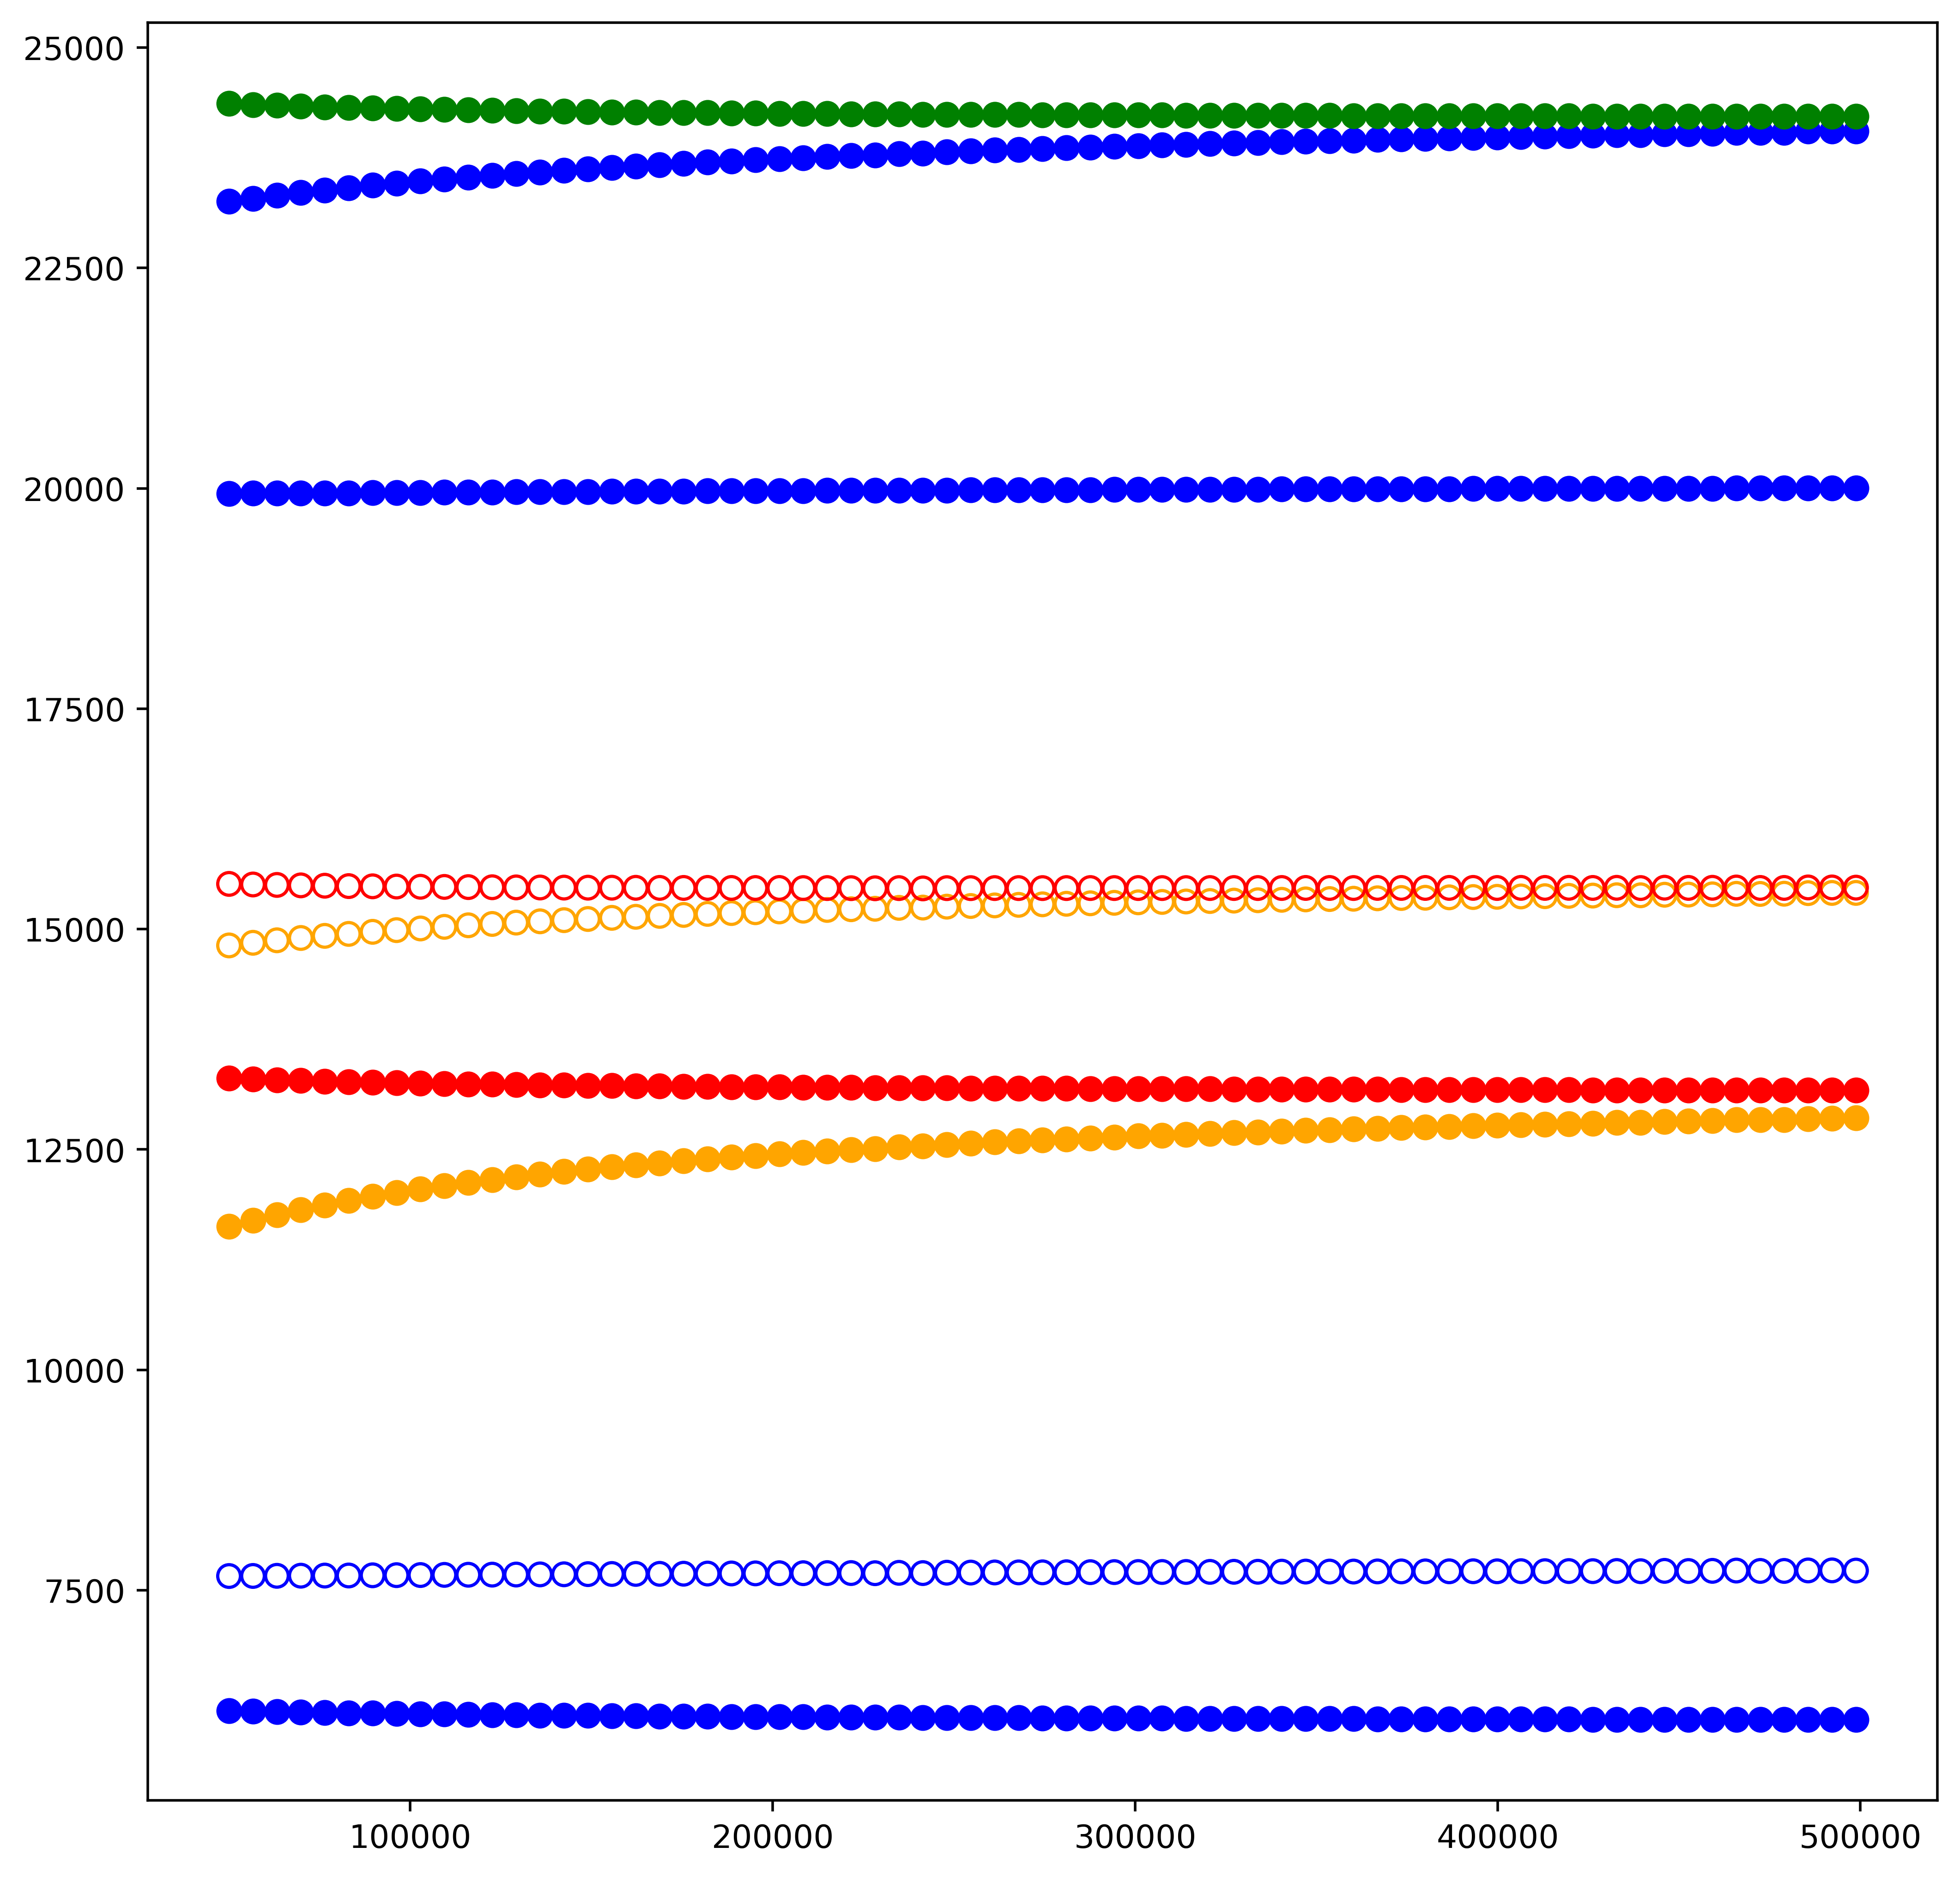

In [4]:
import matplotlib.pyplot as plt
even_nonuniform_df = nonuniform_df.loc[nonuniform_df['p']==1]
odd_nonuniform_df = nonuniform_df.loc[nonuniform_df['p']==-1]
fig = plt.figure(figsize=(10,10), dpi=500)
ax = fig.add_subplot(111)

colors = {
    0: 'orange',
    1: 'blue',
    2: 'red',
    3: 'green'
}

for m in nonuniform_df['m'].unique():
    print(m)
    ax.scatter(
        even_nonuniform_df['param_0'].loc[even_nonuniform_df['m'] == m],
        (2*pi*even_nonuniform_df['ef_1'].loc[even_nonuniform_df['m'] == m]*1e9 
         - gamma*even_nonuniform_df['param_0'].loc[even_nonuniform_df['m'] == m]) / (4*pi*Ms),
        c=colors[m], s=50)
    print(m)
    ax.scatter(
        odd_nonuniform_df['param_0'].loc[odd_nonuniform_df['m'] == m], 
        (2*pi*odd_nonuniform_df['ef_1'].loc[odd_nonuniform_df['m'] == m]*1e9 
         - gamma*odd_nonuniform_df['param_0'].loc[odd_nonuniform_df['m'] == m]) / (4*pi*Ms), 
        facecolor='none', edgecolors=colors[m], s=50)

#ax.axvline(228200)
#ax.axhline(5.995457)

In [5]:
path_p_uniform = 'data_rep/Cyl_axis_oriented_magnetic_field/parity/uniform_magnetization'
path_m_uniform = 'data_rep/Cyl_axis_oriented_magnetic_field/ms/uniform_magnetization'
#path_char = 'data_rep/Cyl_formfactor/mode_char'

uniform_df_p = pipeline_modes_vs_formfactor_parity(path=path_p_uniform)
uniform_df_m = pipeline_modes_vs_formfactor_m(path=path_m_uniform)
#df_char = pipeline_modes_vs_formfactor_char(path=path_char)

uniform_df = uniform_df_m.join(uniform_df_p, on='index', rsuffix='_p')

uniform_df = uniform_df.drop(columns=[col for col in uniform_df.columns if '_p' in col])
uniform_df

While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
/home/aluatar/scicodes/mom_processing/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
While hendling complex numbers exception Can only use .str accessor with string values! of the type <class 'AttributeError'> occured
While hendling complex numbers exception 'NoneType' object is not subscriptable of the type <class 'TypeError'> occured
While hendling

,param_0,ef_1,m,index,p
0,50000.0,3.462054,1.0,0,1.0
1,50000.0,3.961338,1.0,1,-1.0
2,50000.0,5.141768,0.0,2,1.0
3,50000.0,5.489344,2.0,3,1.0
4,50000.0,6.031181,0.0,4,-1.0
...,...,...,...,...,...
616,498800.0,21.939507,0.0,616,-1.0
617,498800.0,21.945566,2.0,617,-1.0
618,498800.0,23.238198,1.0,618,1.0
619,498800.0,24.405615,1.0,619,1.0


In [6]:
uniform_df.loc[6,'m'] = 1

uniform_df.loc[420,'m'] = 1
uniform_df.loc[420,'p'] = 1

uniform_df.loc[392,'m'] = 2

uniform_df.loc[427,'m'] = 0

uniform_df.loc[563,'m'] = 2
uniform_df.loc[554,'m'] = 2

uniform_df.loc[590,'m'] = 2




#uniform_df.loc[uniform_df['param_0'] == 479000], uniform_df.loc[uniform_df['param_0'] == 479000 - 6.6E3]

1.0
1.0
0.0
0.0
2.0
2.0
3.0
3.0


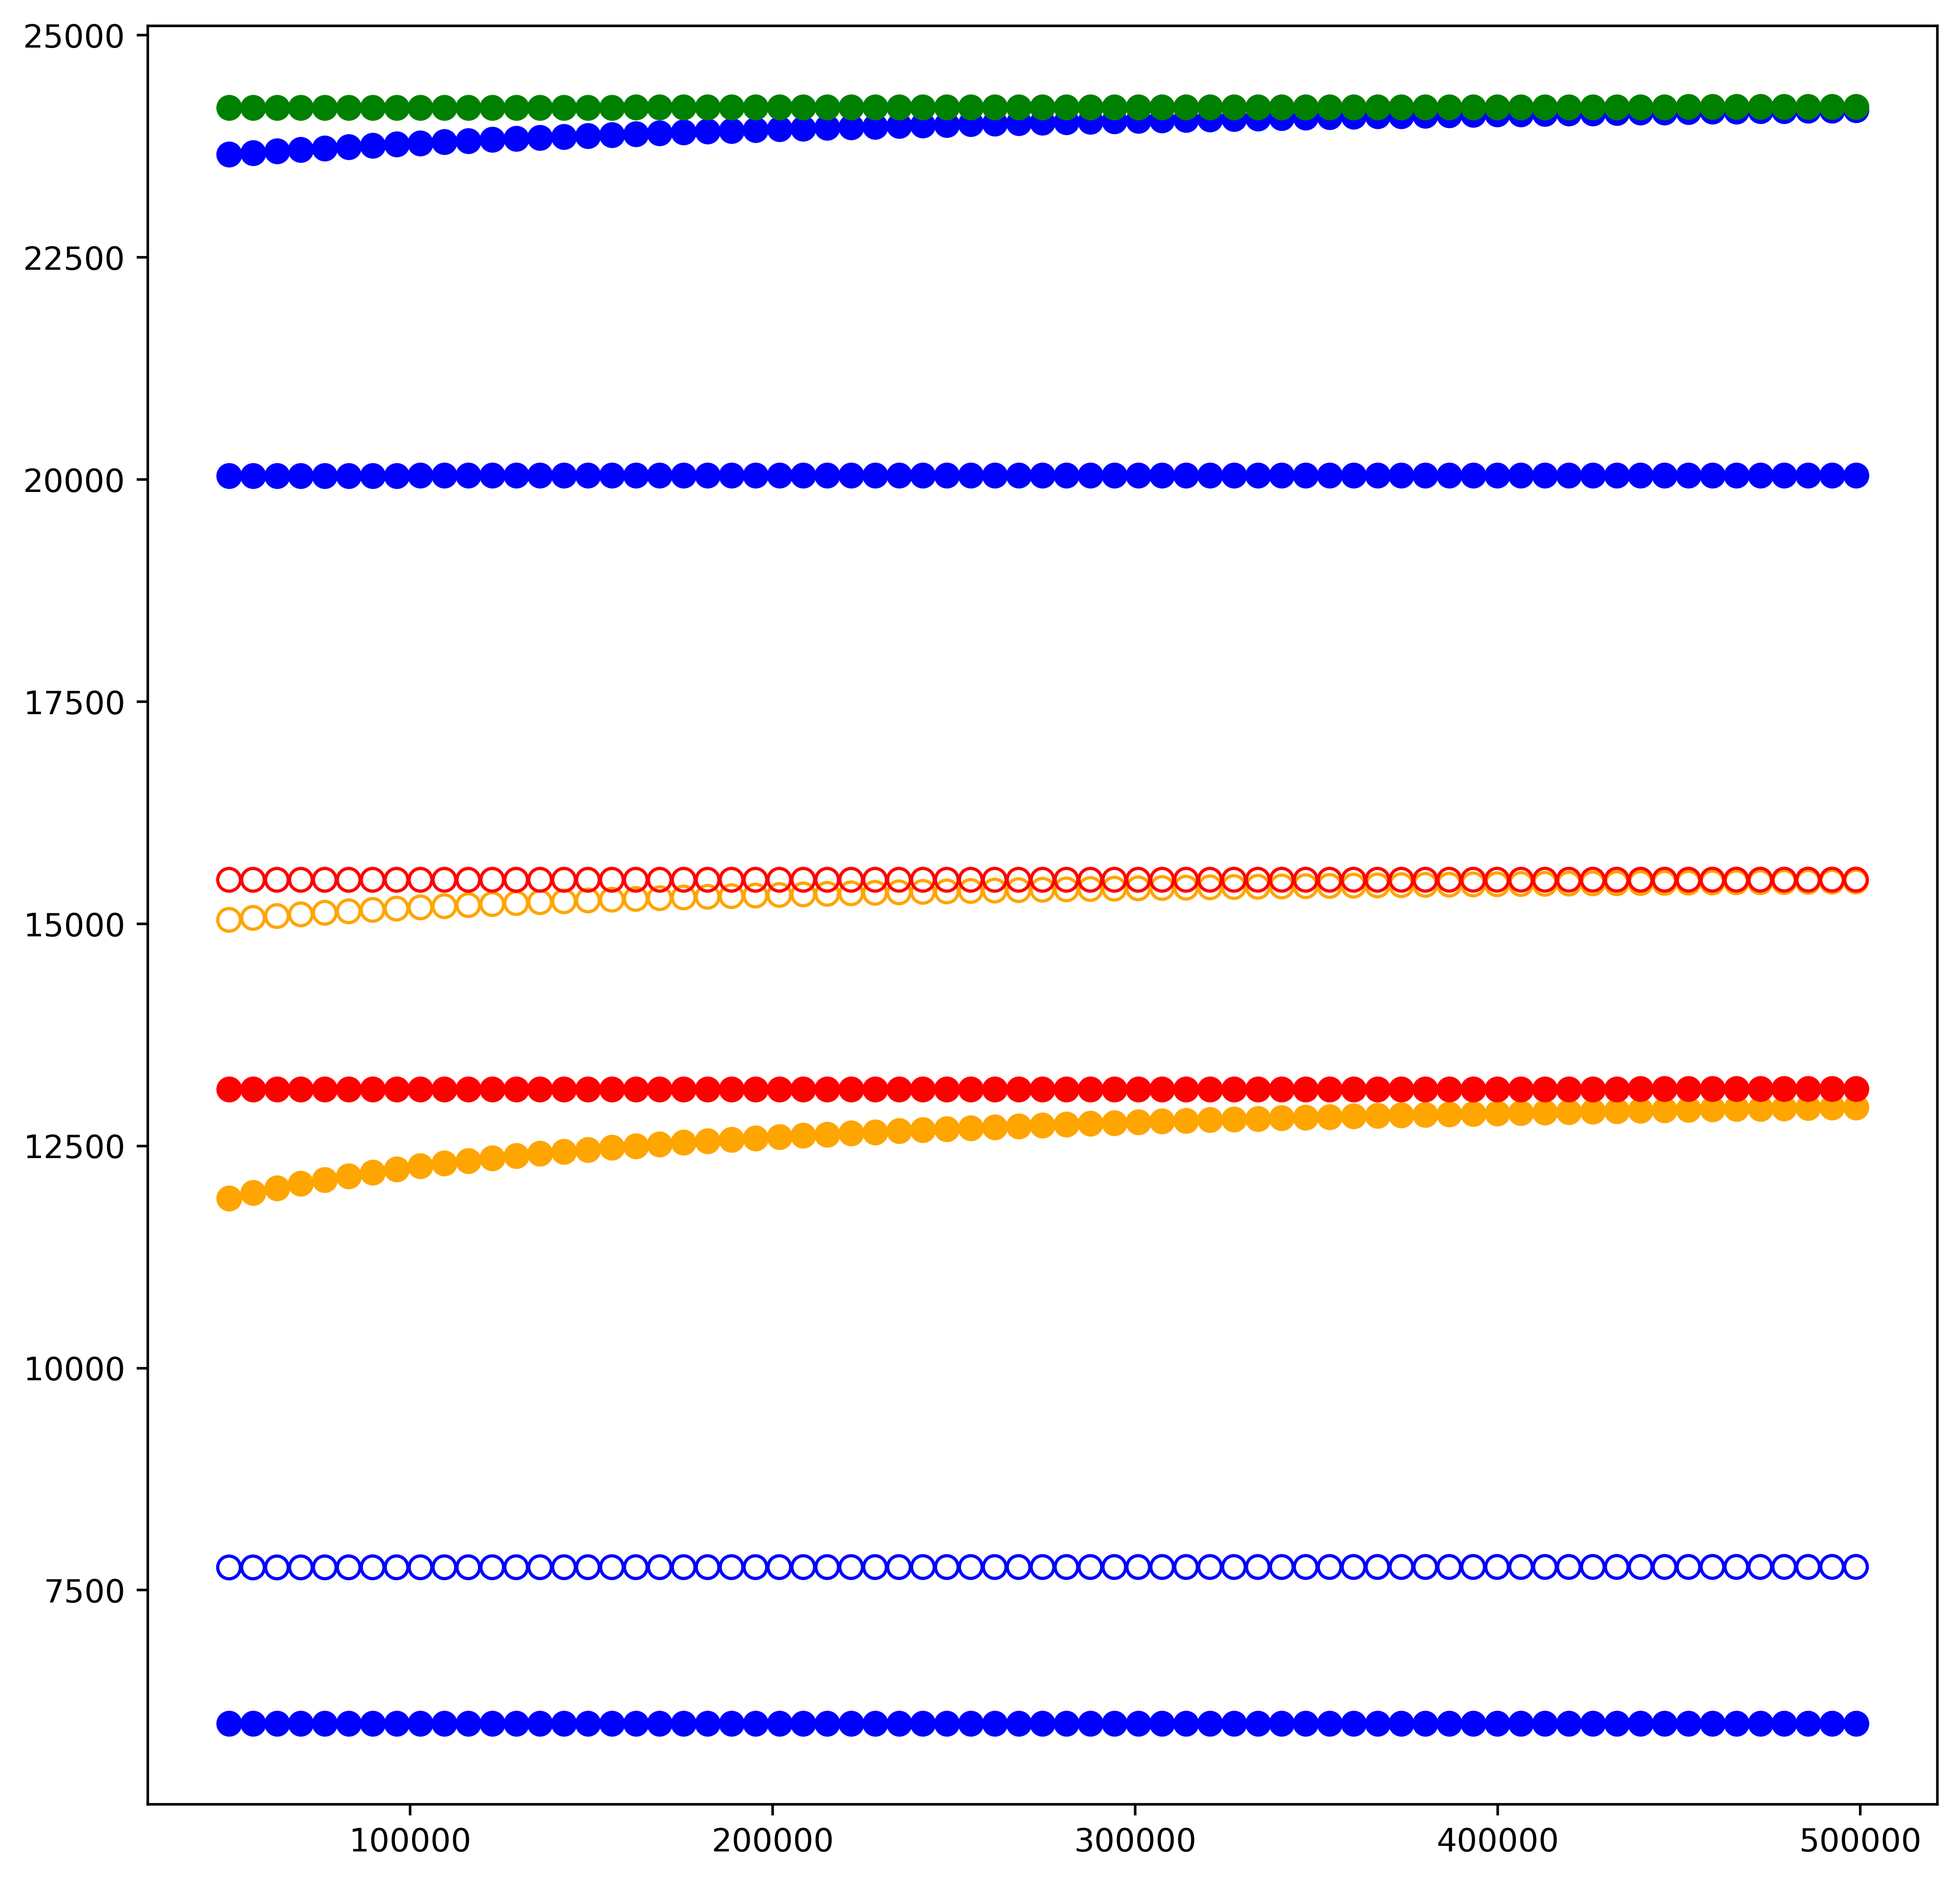

In [7]:
even_uniform_df = uniform_df.loc[uniform_df['p']==1]
odd_uniform_df = uniform_df.loc[uniform_df['p']==-1]
fig = plt.figure(figsize=(10,10), dpi=500)
ax = fig.add_subplot(111)

colors = {
    0: 'orange',
    1: 'blue',
    2: 'red',
    3: 'green'
}

for m in uniform_df['m'].unique():
    print(m)
    ax.scatter(
        even_uniform_df['param_0'].loc[even_uniform_df['m'] == m],
        (2*pi*even_uniform_df['ef_1'].loc[even_uniform_df['m'] == m]*1e9 
         - gamma*even_uniform_df['param_0'].loc[even_uniform_df['m'] == m]) / (4*pi*Ms),
        c=colors[m], s=50)
    print(m)
    ax.scatter(
        odd_uniform_df['param_0'].loc[odd_uniform_df['m'] == m], 
        (2*pi*odd_uniform_df['ef_1'].loc[odd_uniform_df['m'] == m]*1e9 
         - gamma*odd_uniform_df['param_0'].loc[odd_uniform_df['m'] == m]) / (4*pi*Ms), 
        facecolor='none', edgecolors=colors[m], s=50)

#ax.axvline(228200)
#ax.axhline(5.995457)

In [9]:
import matplotlib as mpl 
mpl.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(20,20), dpi=800)

ax_even = fig.add_subplot(211)
ax_odd = fig.add_subplot(212)

markers_map = {
    0: 'o',
    1: '^',
    2: 's',
    3: 'D',
}

ax_even.grid(visible=True, zorder=-1)
ax_odd.grid(visible=True, zorder=-1)

for m in uniform_df['m'].unique():
    print(m)
    ax_even.scatter(
        even_uniform_df['param_0'].loc[even_uniform_df['m'] == m]/ (4*pi*Ms),
        (2*pi*even_uniform_df['ef_1'].loc[even_uniform_df['m'] == m]*1e9 
         - gamma*even_uniform_df['param_0'].loc[even_uniform_df['m'] == m]) / (4*pi*Ms*gamma),
        c='blue', s=100, marker=markers_map[m])
    print(m)
    ax_odd.scatter(
        odd_uniform_df['param_0'].loc[odd_uniform_df['m'] == m]/ (4*pi*Ms), 
        (2*pi*odd_uniform_df['ef_1'].loc[odd_uniform_df['m'] == m]*1e9 
         - gamma*odd_uniform_df['param_0'].loc[odd_uniform_df['m'] == m]) / (4*pi*Ms*gamma), 
        c='blue', s=100, marker=markers_map[m])
    

for m in nonuniform_df['m'].unique():
    print(m)
    ax_even.scatter(
        even_nonuniform_df['param_0'].loc[even_nonuniform_df['m'] == m]/ (4*pi*Ms),
        (2*pi*even_nonuniform_df['ef_1'].loc[even_nonuniform_df['m'] == m]*1e9 
         - gamma*even_nonuniform_df['param_0'].loc[even_nonuniform_df['m'] == m]) / (4*pi*Ms*gamma),
        c='red', s=100, marker=markers_map[m])
    print(m)
    ax_odd.scatter(
        odd_nonuniform_df['param_0'].loc[odd_nonuniform_df['m'] == m] / (4*pi*Ms), 
        (2*pi*odd_nonuniform_df['ef_1'].loc[odd_nonuniform_df['m'] == m]*1e9 
         - gamma*odd_nonuniform_df['param_0'].loc[odd_nonuniform_df['m'] == m]) / (4*pi*Ms*gamma), 
        c='red', s=100, marker=markers_map[m])
    

#for m in nonuniform_df['m'].unique():
#    plt.scatter([],[], marker=markers_map[m], s = 100, color='black', label=r"$m=%d$"%int(m))
    
plt.plot([],[], linewidth=20,color='red', label=r"$\textbf{Non-uniform \ magnetization}$" )
plt.plot([],[], linewidth=20,color='blue', label=r"$\textbf{Uniform \ magnetization}$" )

fig.supxlabel(r"$H^{ext} / 4\pi M_s$", fontsize=50)
fig.supylabel(r"$\frac{\Omega - \gamma H^{ext}}{4\pi \gamma M_s}$", fontsize=55)
ax_even.tick_params(axis='both', which='major', labelsize=30)
ax_even.set_xlim(left=0.02, right=0.285)

ax_odd.tick_params(axis='both', which='major', labelsize=30)
ax_odd.set_xlim(left=0.02, right=0.285)

fig.legend(facecolor='none', fontsize=30, loc=(0.2, 0.25), ncol=2, frameon=False)

import matplotlib.patches as mpatch
plt.savefig('figures/modes_vs_h.png')
    

1.0
1.0
0.0
0.0
2.0
2.0
3.0
3.0
1.0
1.0
0.0
0.0
2.0
2.0
3.0
3.0
